In [1]:
from dolo import *
from matplotlib import pyplot as plt
%matplotlib inline

# Tractable model

Interest rate is fixed equal to $\overline{r}=\frac{1}{\beta}+\Delta r$ where $\beta$ is the time discount.


Income $y_t$ follows a two states markov states. 
We define the good state income by $\overline{y}=1$. The bad state is $\overline{y}-m$ where m is a constant.
The transition probabilities are:

$$ P\left( y_t=\overline{y} \left| \right. y_{t-1}=\overline{y} \right) = 1-u$$
$$ P\left( y_t=\overline{y}  \left| \right. y_{t-1}=\overline{y}-m \right) = 0$$


$\overline{r}=\frac{1}{\beta}+\Delta r$.
Income process $y_t$ and interest rate $r_t$ are both normally distributed with:
    $$y_t = \overline{y} + \epsilon_{y,t}$$
    $$r_t = \overline{r} + \epsilon_{r,t}$$

The law of motion for cash-in-hand $m_t$ is:

$$m_t = y_t + (m_{t-1}-c_{t-1})r_t$$

The consumption $c_{t-1}\in]0,m_t]$ si chosen optimally so that the following Euler criterium  is zero:

$$ E_t \left[ \frac{c_{t+1}}{c_t} \beta r_{t+1}\right] - 1$$

the slackness onditions imply that this criterium is positive only if $c_t=0$ (i.e. never) or negative if $c_t=m_t$.

For any $m_{t}$ there is a level of consumption $\overline{c}_t$ such that $E_t \left[ m_{t+1} \right] = m_t$. It is defined by:

$$ c_t = m_t \left(1-\frac{1}{\overline{r}}\right) + \frac{y_t}{\overline{r}}$$

# Interactive Solution

In [2]:
model = yaml_import('basic_unemployment.yaml')

Model type detected as 'dtmscc'
Missing model name. Set as 'anonymous'


In [3]:
from dolo.misc.decorators import cachedondisk
# @cachedondisk
def new_fun(**calib):
    calib = calib.copy()
    model.set_calibration(**calib)
    mdr = time_iteration(model, verbose=False)
    dr = time_iteration(model, verbose=False, orders=[100], initial_guess = mdr)
#     sim = simulate(model, mdr, 0)
    dsim_0 = plot_decision_rule(model, mdr, 'm',i0=0,n_steps=100)
    dsim_1 = plot_decision_rule(model, mdr, 'm',i0=1,n_steps=100)
    dsim_0['y'] = model.markov_chain[0][0]+(dsim_0['m']*0)  # workaround since dolo does not include y
    dsim_1['y'] = model.markov_chain[0][1]+(dsim_0['m']*0)
    return [dr,dsim_0, dsim_1]

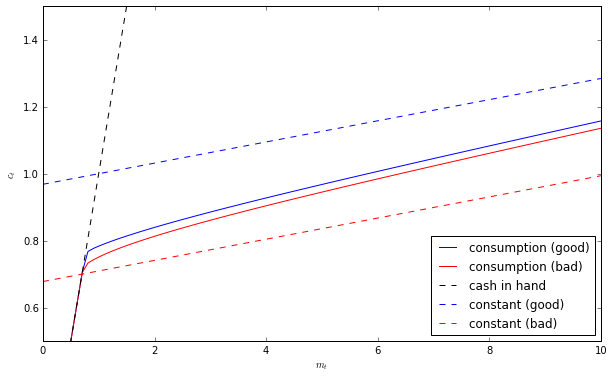

In [4]:
from ipywidgets import interact
@interact
def play_with_results(gamma=(2,6,1), mu=(0.1,0.5,0.1), u=(0.1,0.5,0.1), delta_r=(0.005, 0.04,0.005)):
    beta = model.get_calibration('β')
#     print('gamma: {}'.format(gamma))
    mdr,dsim_0, dsim_1 = new_fun(gamma=gamma, mu=mu, u=u, delta_r=delta_r)
    dsim = dsim_0
    plt.figure(figsize=((10,6)))
    plt.plot(dsim['m'], dsim_0['c'],label='consumption (good)', color='blue')
    plt.plot(dsim['m'], dsim_1['c'],label='consumption (bad)', color='red')
    plt.plot(dsim['m'], dsim['m'], label='cash in hand', color='black', linestyle='--')
    plt.ylim(0.5,1.5)
    r = model.get_calibration('r')

    noacc_0 = dsim_0['m']-(dsim['m']-dsim_0['y'])/r
    noacc_1 = dsim_1['m']-(dsim['m']-dsim_1['y'])/r
    plt.plot(dsim['m'],noacc_0,label='constant (good)', color='blue', linestyle='--')
    plt.plot(dsim['m'],noacc_1,label='constant (bad)', color='red', linestyle='--')
    plt.legend(loc='lower right')
    plt.xlabel('$m_t$')
    plt.ylabel('$c_t$')

# non interactive version

In [5]:
# import the model
model = yaml_import('basic_unemployment.yaml')

Model type detected as 'dtmscc'
Missing model name. Set as 'anonymous'


In [6]:
# set calibration
model.set_calibration(gamma=4, m=0.3, u=0.3, delta_r=0.02)

In [7]:
# solve
mdr = time_iteration(model, verbose=False)

(0, 2)

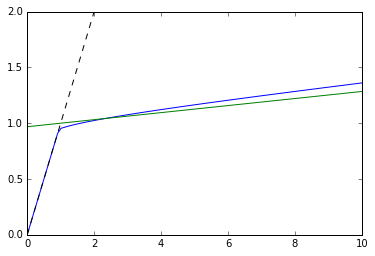

In [8]:
# plot desicion rule
i0 = 0 # good state
dsim = plot_decision_rule(model, mdr, 'm',i0=i0,n_steps=100)
plt.plot(dsim['m'], dsim['c'])
plt.plot(dsim['m'], dsim['m'], color='black', linestyle='--')
r = model.get_calibration('r')
y = 1
noacc = dsim['m']-(dsim['m']-y)/r
plt.plot(dsim['m'],noacc)
plt.ylim(0,2)

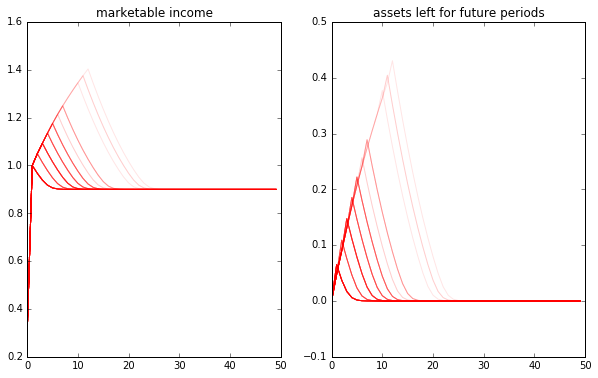

In [9]:
# stochastic simulations
sim = simulate(model, mdr, 0)  # stochastic simulations starting from good state
plt.figure(figsize=(10,6))
plt.subplot(121)
for i in range(sim.shape[0]):
    plt.plot(sim[i]['m'], color='red', alpha=0.1)
plt.title("marketable income")
plt.subplot(122)
for i in range(sim.shape[0]):
    plt.plot(sim[i]['m']-sim[i]['c'], color='red', alpha=0.1)
plt.title("assets left for future periods")